# Analisando um dataset com as características musicais das 200 músicas mais tocadas no Spotify

O objetivo desse notebook foi analisar as características musicais das 200 músicas mais tocadas no Spotify na primeira semana de novembro, para o Brasil, de acordo com o dataset criado ** 

lista gerada pelo [Spotify Charts](https://spotifycharts.com/regional/br/weekly/2019-11-01--2019-11-08)

*Descrição dos dados*: Existem dois arquivos .csv (Spotify_Brasil.csv, Spotify_Mundo.csv). Eles incluem:

- Nome da música
- Artista
- Gênero
- Ano
- Características da música (bpm, energia, dancibilidade, etc.)


In [3]:
# importando as bibliotecas necessárias

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# carregando os dados em um DataFrame

df = pd.read_csv('caract_top200.csv', sep = '|', encoding='utf-8')
df.head(10)

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,1,Surtada,Dadá Boladão,4767587,0.2490,0.832,152784,0.550,0.000008,5,0.1820,-7.026,0,0.0587,154.064,4,0.881
1,2,Gaiola É o Troco,MC Du Black,4066848,0.4200,0.722,187246,0.840,0.000000,10,0.1120,-3.240,0,0.0785,150.108,4,0.851
2,3,Some que ele vem atrás,Anitta,4053084,0.0748,0.648,194771,0.795,0.000000,0,0.3800,-5.536,0,0.1700,180.043,4,0.598
3,4,Supera,Marília Mendonça,4047123,0.0604,0.665,147748,0.743,0.000000,4,0.9590,-4.434,1,0.0567,131.573,4,0.658
4,5,Hit Contagiante,Felipe Original,3600154,0.1320,0.819,137125,0.684,0.000000,6,0.0942,-7.169,0,0.1190,170.187,4,0.959
5,6,Chama Ela,Lexa,3516109,0.4600,0.888,120200,0.841,0.000091,6,0.0568,-1.933,1,0.1470,149.994,4,0.964
6,7,quando a bad bater,Luan Santana,3494270,0.3040,0.648,179722,0.789,0.000000,1,0.5320,-4.767,1,0.0414,128.124,4,0.530
7,8,Cheirosa,Jorge & Mateus,3373797,0.2400,0.528,181930,0.870,0.000000,11,0.3330,-3.123,1,0.0851,152.370,4,0.714
8,9,Contatinho,Leo Santana,3137987,0.2230,0.787,173230,0.934,0.000019,10,0.9510,-5.136,0,0.0773,152.018,4,0.813
9,10,Tijolão,Jorge & Mateus,3127021,0.4690,0.637,175219,0.877,0.000000,4,0.3430,-3.680,0,0.1980,118.889,4,0.691


In [54]:
df.tail(10)

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
190,191,Liar,Camila Cabello,592026,0.0169,0.740,207039,0.498,0.002820,11,0.3190,-6.684,0,0.0456,98.016,4,0.652
191,192,"Ai, Amor",ANAVITÓRIA,591281,0.5460,0.725,220567,0.532,0.001310,4,0.0969,-10.531,1,0.0457,103.940,4,0.559
192,193,Garupa 2,Mc Nando,590040,0.7050,0.947,142500,0.921,0.003500,7,0.0621,-2.988,1,0.3780,130.022,4,0.738
193,194,7 Dias 7 Corpos,Dj Guuga,589657,0.3800,0.891,162433,0.877,0.000000,3,0.1180,-1.586,0,0.3740,79.990,4,0.853
194,195,Love À Queima Roupa,Marília Mendonça,589594,0.5240,0.761,149051,0.848,0.000000,4,0.7940,-4.265,1,0.0371,121.788,4,0.920
195,196,Garupa,Luísa Sonza,587771,0.1750,0.785,128067,0.760,0.000063,6,0.1690,-4.168,0,0.0438,101.964,4,0.498
196,197,Mandona,Oriente,585805,0.3390,0.652,239999,0.400,0.000000,11,0.1050,-11.284,0,0.4470,88.755,4,0.556
197,198,Dizeres,Lourena,585786,0.6650,0.832,257646,0.484,0.000010,10,0.0822,-4.060,1,0.1890,142.111,4,0.830
198,199,Cerveja De Garrafa,Atitude 67,579415,0.5990,0.673,210387,0.841,0.000000,4,0.7230,-4.968,1,0.0591,162.961,4,0.663
199,200,Nave Espacial,Liu,579415,0.1190,0.777,185341,0.763,0.000005,6,0.1580,-6.883,0,0.0974,127.022,4,0.242


In [5]:
round(df.describe(),2)

,Position,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,100.50,1256381.62,0.37,0.68,186888.40,0.69,0.00,5.54,0.35,-5.52,0.60,0.13,126.74,4.00,0.64
std,57.88,797882.51,0.24,0.12,54490.28,0.17,0.01,3.63,0.31,2.42,0.49,0.13,26.61,0.33,0.21
min,1.00,579415.00,0.00,0.40,120200.00,0.14,0.00,0.00,0.04,-14.79,0.00,0.03,71.10,1.00,0.06
25%,50.75,710979.00,0.18,0.59,160831.75,0.56,0.00,2.00,0.10,-6.81,0.00,0.05,104.31,4.00,0.53
50%,100.50,973083.50,0.35,0.69,179082.50,0.71,0.00,6.00,0.20,-5.14,1.00,0.08,127.00,4.00,0.68
75%,150.25,1464292.25,0.53,0.78,202334.75,0.82,0.00,9.00,0.61,-3.84,1.00,0.16,149.85,4.00,0.79
max,200.00,4767587.00,0.94,0.95,577819.00,0.97,0.13,11.00,0.98,0.30,1.00,0.84,186.00,5.00,0.97


Análise: danceability, energy, valence são as características com taxas mais altas

#### Identificando correlações entre as colunas

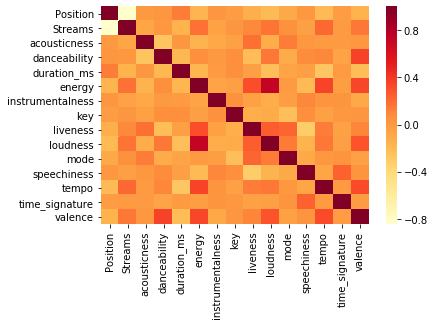

In [6]:
sns.heatmap(df.corr(),cmap="YlOrRd")

Análise: Os tons mais fortes refletem alta correlação entre "loudness e energy", "valence e danceability" e "valence e energy"

In [7]:
Correlação = df[['loudness','energy','valence','danceability']]

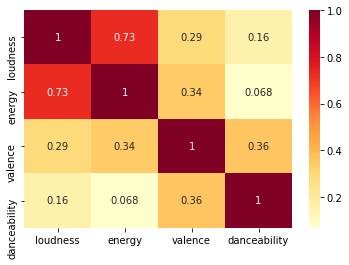

In [8]:
sns.heatmap(Correlação.corr(),annot=True,cmap="YlOrRd");

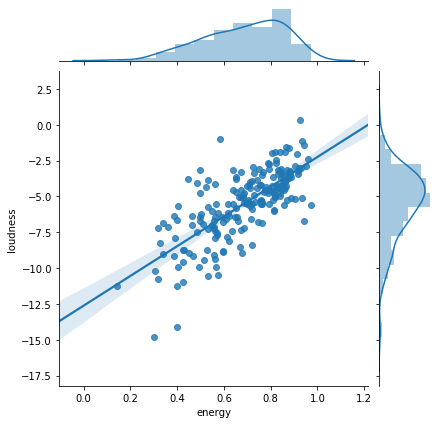

In [9]:
sns.jointplot(data=Correlação,y='loudness',x='energy',kind='reg')

Análise: com decibéis mais próximos de zero, a probabilidade da música ter mais energia é maior

#### Analisando recorrências

In [10]:
# Artistas mais presentes

df['Artist'].value_counts().head()

Marília Mendonça       13
MC Kevin o Chris        6
Zé Neto & Cristiano     5
Gusttavo Lima           5
Pabllo Vittar           4
Name: Artist, dtype: int64

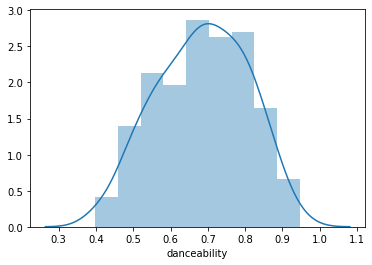

In [11]:
# Dancibilidade

sns.distplot(df['danceability'])

Análise: A maior parte das músicas mais tocadas pode ser considerada dançante (valores acima de 50), mas para uma melhor  análise vamos dividir seus valores em três grupos:

- Maior que 0.5 -> Dançante
- Menor que 0.5 -> Não dançante ou música instrumental

In [27]:
# Criando condições

Md = df['danceability']>0.50
Nd = df['danceability']<=0.50

In [31]:
# Criando DataFrame com as condições

data = [Md.sum(),Nd.sum()]
dança = pd.DataFrame(data,columns=['Ocorrências'],
                   index=['Dançante','Instrumental'])
dança

,Ocorrências
Dançante,183
Instrumental,17


In [37]:
df[df['danceability']<=0.50]

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
10,11,Ferida Curada,Zé Neto & Cristiano,3081748,0.4900,0.490,159164,0.845,0.0,2,0.2130,-3.359,1,0.0973,146.105,4,0.548
16,17,Kenny G,Matuê,2578226,0.0778,0.417,189600,0.767,0.0,9,0.1130,-3.310,1,0.1940,72.573,3,0.152
59,60,Solteiro Não Trai,Gustavo Mioto,1324799,0.4830,0.493,187349,0.832,0.0,10,0.9560,-3.420,1,0.2010,157.964,4,0.599
62,63,Nem de Graça / Saudade Arregaça,Pixote,1289036,0.6050,0.477,342622,0.813,0.0,10,0.4670,-5.919,1,0.0743,97.888,4,0.750
64,65,Notificação Preferida,Zé Neto & Cristiano,1248406,0.7780,0.398,182341,0.838,0.0,8,0.1890,-4.734,0,0.1300,156.008,3,0.206
66,67,Pouco a Pouco,Dilsinho,1219454,0.8620,0.485,196831,0.648,0.0,2,0.8640,-6.465,1,0.0362,148.052,4,0.692
101,102,Acende o Isqueiro,Orochi,970700,0.3800,0.480,207529,0.565,0.0,8,0.0960,-9.954,0,0.3750,112.988,5,0.806
105,106,Deixa,Lagum,930214,0.8210,0.498,176025,0.326,0.0,0,0.1930,-8.223,1,0.0631,81.457,4,0.323
125,126,Obrigado por Estragar Tudo,Marília Mendonça,812304,0.6060,0.438,176667,0.728,0.0,2,0.9150,-4.934,1,0.1230,152.760,4,0.609
127,128,Dona de mim,IZA,808206,0.0397,0.412,208941,0.809,0.0,9,0.0899,-3.660,0,0.1440,81.470,4,0.254


In [45]:
df[df['danceability']>0.90]

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
39,40,Te Amo Sem Compromisso,MC Doni,1731586,0.00369,0.940,132923,0.711,0.000117,3,0.0765,-3.975,1,0.191,130.000,4,0.693
137,138,Cem Mil,Gusttavo Lima,774613,0.30900,0.901,203740,0.819,0.000000,0,0.7010,-1.874,1,0.051,129.935,4,0.924
192,193,Garupa 2,Mc Nando,590040,0.70500,0.947,142500,0.921,0.003500,7,0.0621,-2.988,1,0.378,130.022,4,0.738


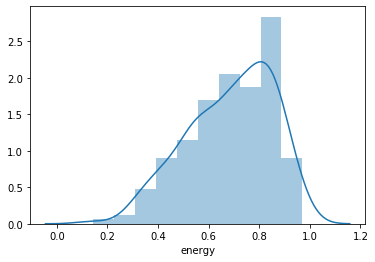

In [39]:
# Energia

sns.distplot(df['energy'])

In [40]:
# Criando condições

Me=df['energy']>0.50
Be=df['energy']<=0.50

In [41]:
# Criando DataFrame com as condições

data=[Me.sum(),Be.sum()]
energia=pd.DataFrame(data,columns=['Ocorrências'],
                   index=['Muita','Baixa'])
energia

,Ocorrências
Muita,167
Baixa,33


In [50]:
df[df['energy']<=0.40]

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
49,50,Lose You To Love Me,Selena Gomez,1498361,0.5760,0.505,206459,0.340,0.000000,4,0.2100,-9.005,1,0.0438,101.993,4,0.0916
52,53,Lalala,Y2K,1424633,0.1810,0.843,160627,0.391,0.000000,2,0.1370,-7.899,1,0.0845,129.972,4,0.4960
84,85,Ela É do Tipo,MC Kevin o Chris,1088554,0.9450,0.632,204931,0.398,0.000000,6,0.2280,-6.615,1,0.3730,90.695,4,0.6330
88,89,Morena Cor do Pecado,MC Kevin o Chris,1051338,0.3070,0.708,133878,0.305,0.000009,6,0.1200,-10.192,1,0.8410,104.432,5,0.8600
105,106,Deixa,Lagum,930214,0.8210,0.498,176025,0.326,0.000000,0,0.1930,-8.223,1,0.0631,81.457,4,0.3230
121,122,Dois Corações,Melim,830988,0.8910,0.511,182993,0.142,0.000000,1,0.1080,-11.271,1,0.0308,131.633,4,0.2220
140,141,Memories,Maroon 5,762472,0.8370,0.764,189486,0.320,0.000000,11,0.0822,-7.209,1,0.0546,91.019,4,0.5750
142,143,Hoje Eu Vou Parar Na Gaiola,Mc Livinho,750406,0.0331,0.650,177094,0.361,0.000000,2,0.0978,-7.153,1,0.4040,89.803,4,0.8440
148,149,7 rings,Ariana Grande,712372,0.5920,0.778,178627,0.317,0.000000,1,0.0881,-10.732,0,0.3340,140.048,4,0.3270
153,154,Shallow,Lady Gaga,695836,0.3710,0.572,215733,0.385,0.000000,7,0.2310,-6.362,1,0.0308,95.799,4,0.3230


In [49]:
df[df['energy']>0.95]

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
20,21,Quem Traiu Levou,Gusttavo Lima,2251978,0.325,0.583,154183,0.958,0.000002,11,0.322,-2.395,1,0.0849,173.937,4,0.826
126,127,Não sou obrigada,POCAH,808565,0.356,0.819,148340,0.951,0.000000,6,0.145,-2.896,0,0.1410,153.963,4,0.963
158,159,Vamos pra Gaiola,MC Kevin o Chris,671220,0.917,0.872,161600,0.971,0.001430,6,0.121,-5.576,1,0.2810,149.987,4,0.521


In [55]:
df['diferenca'] = (df['danceability'] - df['energy'])

In [63]:
df.sort_values(['diferenca']).head(1)

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,diferenca
64,65,Notificação Preferida,Zé Neto & Cristiano,1248406,0.778,0.398,182341,0.838,0.0,8,0.189,-4.734,0,0.13,156.008,3,0.206,-0.44


In [65]:
df.sort_values(['diferenca']).tail(1)

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,diferenca
154,155,Outro Dia,A Banca Records,695413,0.313,0.841,232525,0.303,0.000007,9,0.0926,-14.794,1,0.389,128.061,4,0.32,0.538


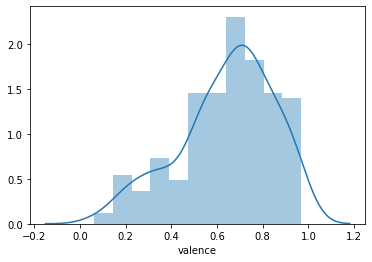

In [42]:
sns.distplot(df['valence'])

In [43]:
# Criando condições

Mv=df['valence']>0.50
Bv=df['valence']<=0.50

In [44]:
# Criando DataFrame com as condições

data=[Mv.sum(),Bv.sum()]
valenca=pd.DataFrame(data,columns=['Ocorrências'],
                   index=['Muita','Baixa'])
valenca

,Ocorrências
Muita,156
Baixa,44


In [53]:
df[df['valence']>0.964]

,Position,Track,Artist,Streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
5,6,Chama Ela,Lexa,3516109,0.460,0.888,120200,0.841,0.000091,6,0.0568,-1.933,1,0.1470,149.994,4,0.964
67,68,Bebe e Vem Me Procurar,Saia Rodada,1206651,0.415,0.571,154291,0.941,0.000007,5,0.2990,-6.712,0,0.0334,169.950,4,0.969
187,188,Botadona,Maneiro Na Voz,597484,0.501,0.666,120346,0.671,0.000004,8,0.3160,-8.522,0,0.0577,180.096,4,0.964


In [133]:
df[df['valence']<0.2]

,Track,Artist,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label,diferenca
16,Kenny G,Matuê,0.07780,0.417,0.767,0.113,0.760731,0.1940,0.012777,0.1520,0,NaN
49,Lose You To Love Me,Selena Gomez,0.57600,0.505,0.340,0.210,0.383479,0.0438,0.268848,0.0916,0,NaN
78,In The Dark,Vintage Culture,0.00216,0.560,0.888,0.104,0.640103,0.0511,0.460832,0.1620,1,NaN
89,HIGHEST IN THE ROOM,Travis Scott,0.05460,0.598,0.427,0.210,0.399444,0.0317,0.046688,0.0605,1,NaN
149,Piece Of Your Heart,MEDUZA,0.03120,0.797,0.860,0.334,0.689852,0.0413,0.460684,0.1920,1,NaN
184,Goodbyes,Post Malone,0.44700,0.580,0.653,0.111,0.727080,0.0745,0.688711,0.1750,0,NaN


# Clusterizando

In [103]:
df.drop(['Position', 'Streams', 'duration_ms', 'instrumentalness', 'key', 'mode', 
         'time_signature', 'diferenca'], axis = 1, inplace = True)

#fazer assim:
#songs_features = df.copy()
#songs_features = df.drop(['Position', 'Streams', 'duration_ms', 'instrumentalness', 'key', 'mode', 'time_signature', 'diferenca'],axis=1)


In [104]:
# Loudness feature is from -60db to 0 so we will normalise this column between 0 and 1
# Tempo feature is in BPM so we will scale between 0 and 1 too
from sklearn import preprocessing

loudness = df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
df['loudness'] = pd.DataFrame(loudness_scaled)

In [105]:
tempo = df[['tempo']].values
tempo_scaled = min_max_scaler.fit_transform(tempo)
df['tempo'] = pd.DataFrame(tempo_scaled)

In [106]:
df.head()

,Track,Artist,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
0,Surtada,Dadá Boladão,0.2490,0.832,0.550,0.1820,0.514573,0.0587,0.722073,0.881,0
1,Gaiola É o Troco,MC Du Black,0.4200,0.722,0.840,0.1120,0.765368,0.0785,0.687640,0.851,0
2,Some que ele vem atrás,Anitta,0.0748,0.648,0.795,0.3800,0.613275,0.1700,0.948194,0.598,0
3,Supera,Marília Mendonça,0.0604,0.665,0.743,0.9590,0.686275,0.0567,0.526312,0.658,1
4,Hit Contagiante,Felipe Original,0.1320,0.819,0.684,0.0942,0.505101,0.1190,0.862408,0.959,0


In [108]:
# remove song names, artist and id before clustering

songs_features = df.copy()
songs_features = df.drop(['Track', 'Artist'],axis=1)


In [109]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)

In [110]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39838192573563874)
For n_clusters = 3, silhouette score is 0.33104116842146597)
For n_clusters = 4, silhouette score is 0.259944458380766)
For n_clusters = 5, silhouette score is 0.2408865053098358)
For n_clusters = 6, silhouette score is 0.23769808767246153)
For n_clusters = 7, silhouette score is 0.22915975066156055)
For n_clusters = 8, silhouette score is 0.22713436723140276)
For n_clusters = 9, silhouette score is 0.20641072936143814)
For n_clusters = 10, silhouette score is 0.2064409667617509)
For n_clusters = 11, silhouette score is 0.18717863466717397)
For n_clusters = 12, silhouette score is 0.20018077121493255)
For n_clusters = 13, silhouette score is 0.1849646612775708)
For n_clusters = 14, silhouette score is 0.19093931767474906)


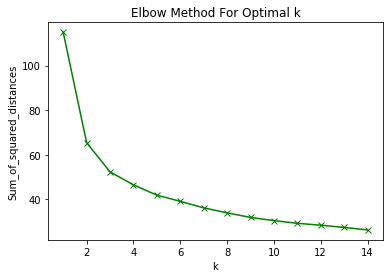

In [111]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [112]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(songs_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [113]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

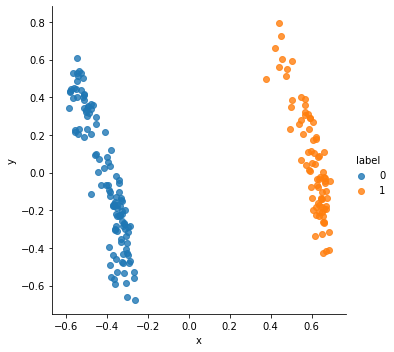

In [114]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)


In [115]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

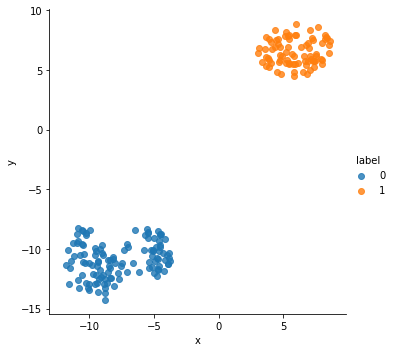

In [116]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [117]:
df['label'] = y_kmeans

# shuffle dataset

df['label'].value_counts()

0    119
1     81
Name: label, dtype: int64

In [118]:
df[df['label'] == 0].head()

,Track,Artist,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
3,Supera,Marília Mendonça,0.0604,0.665,0.743,0.9590,0.686275,0.0567,0.526312,0.658,0
5,Chama Ela,Lexa,0.4600,0.888,0.841,0.0568,0.851948,0.1470,0.686648,0.964,0
6,quando a bad bater,Luan Santana,0.3040,0.648,0.789,0.5320,0.664216,0.0414,0.496292,0.530,0
7,Cheirosa,Jorge & Mateus,0.2400,0.528,0.870,0.3330,0.773119,0.0851,0.707329,0.714,0
10,Ferida Curada,Zé Neto & Cristiano,0.4900,0.490,0.845,0.2130,0.757485,0.0973,0.652798,0.548,0


In [119]:
df[df['label'] == 1].head()

,Track,Artist,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
0,Surtada,Dadá Boladão,0.2490,0.832,0.550,0.1820,0.514573,0.0587,0.722073,0.881,1
1,Gaiola É o Troco,MC Du Black,0.4200,0.722,0.840,0.1120,0.765368,0.0785,0.687640,0.851,1
2,Some que ele vem atrás,Anitta,0.0748,0.648,0.795,0.3800,0.613275,0.1700,0.948194,0.598,1
4,Hit Contagiante,Felipe Original,0.1320,0.819,0.684,0.0942,0.505101,0.1190,0.862408,0.959,1
8,Contatinho,Leo Santana,0.2230,0.787,0.934,0.9510,0.639772,0.0773,0.704265,0.813,1


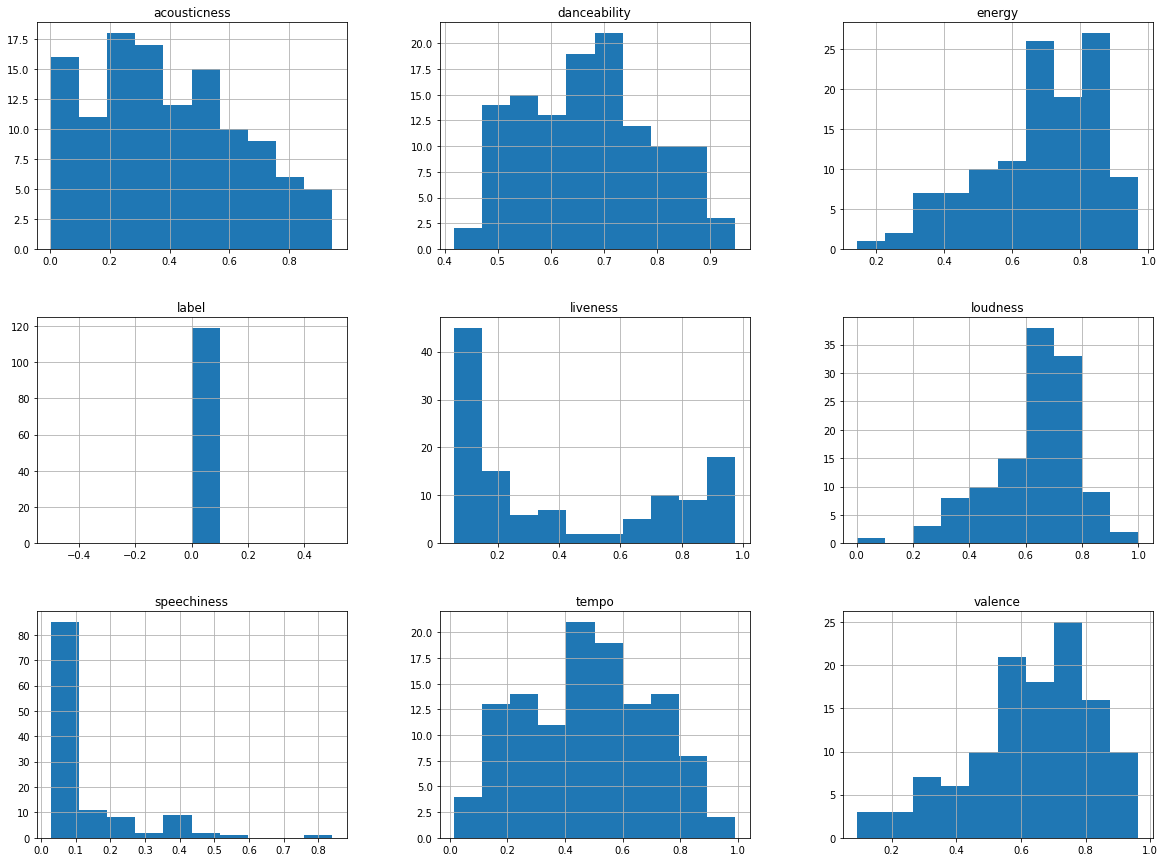

In [120]:
df[df['label'] == 0].hist(figsize=(20,15));

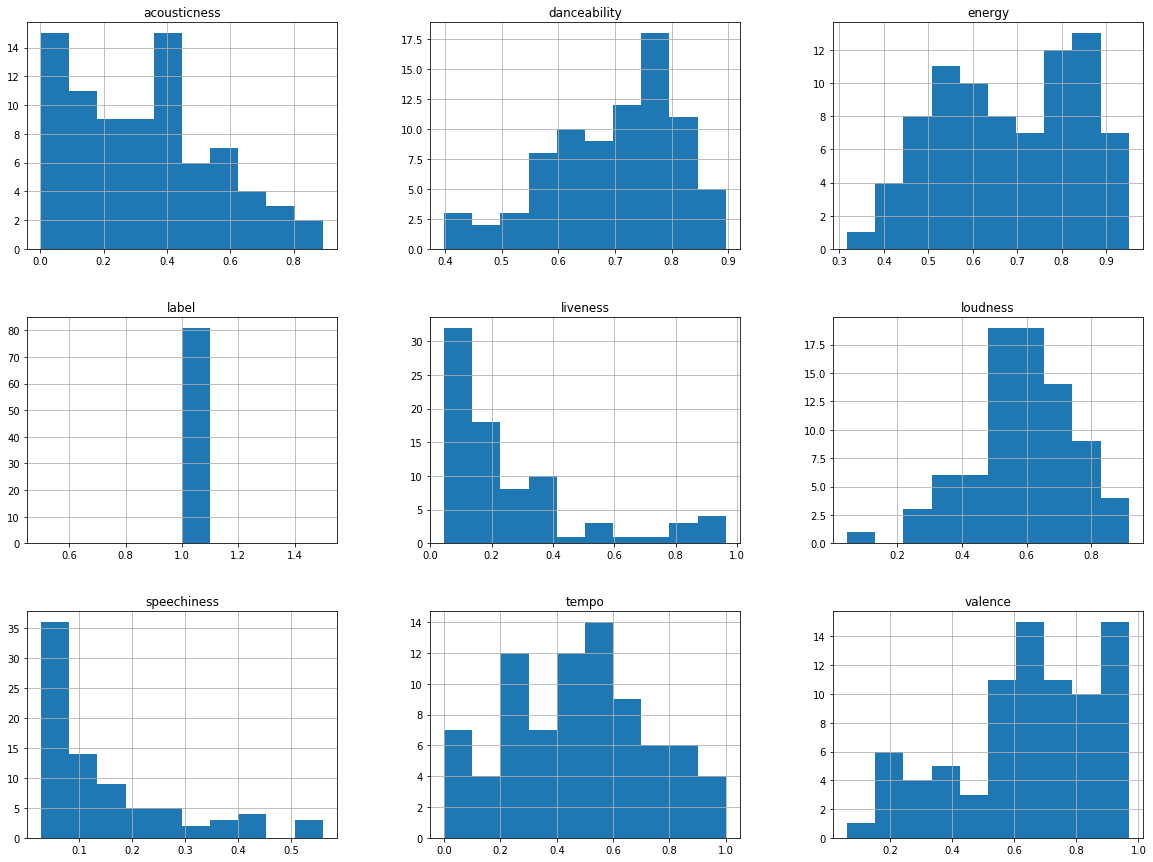

In [121]:
df[df['label'] == 1].hist(figsize=(20,15));

In [122]:
df[df['label'] == 0].describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.0
mean,0.395139,0.672992,0.684370,0.412146,0.633800,0.122961,0.487280,0.634829,0.0
std,0.244057,0.122753,0.176571,0.337756,0.158501,0.133911,0.219387,0.190341,0.0
min,0.002370,0.417000,0.142000,0.056800,0.000000,0.027700,0.012777,0.091600,0.0
25%,0.215000,0.570000,0.561500,0.107000,0.554153,0.043950,0.300670,0.529000,0.0
50%,0.370000,0.673000,0.712000,0.237000,0.668720,0.071600,0.494125,0.674000,0.0
75%,0.566500,0.759000,0.826000,0.748000,0.738739,0.128500,0.677509,0.773500,0.0
max,0.945000,0.947000,0.971000,0.975000,1.000000,0.841000,0.992958,0.964000,0.0


In [123]:
df[df['label'] == 1].describe()

,acousticness,danceability,energy,liveness,loudness,speechiness,tempo,valence,label
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,0.327922,0.700123,0.686074,0.268038,0.586379,0.149847,0.479867,0.650685,1.0
std,0.220403,0.118120,0.160727,0.238124,0.159267,0.134604,0.249787,0.232730,0.0
min,0.002160,0.398000,0.317000,0.044900,0.045244,0.028700,0.000000,0.060500,1.0
25%,0.148000,0.615000,0.562000,0.099800,0.514573,0.051100,0.268596,0.530000,1.0
50%,0.336000,0.732000,0.684000,0.161000,0.613209,0.086700,0.468657,0.679000,1.0
75%,0.467000,0.785000,0.820000,0.343000,0.690249,0.198000,0.686448,0.850000,1.0
max,0.892000,0.896000,0.951000,0.964000,0.915806,0.560000,1.000000,0.969000,1.0


In [124]:
df[df['label'] == 0].mean()

acousticness    0.395139
danceability    0.672992
energy          0.684370
liveness        0.412146
loudness        0.633800
speechiness     0.122961
tempo           0.487280
valence         0.634829
label           0.000000
dtype: float64

In [131]:
df[df['label'] == 1].mean()

acousticness    0.327922
danceability    0.700123
energy          0.686074
liveness        0.268038
loudness        0.586379
speechiness     0.149847
tempo           0.479867
valence         0.650685
label           1.000000
diferenca            NaN
dtype: float64